## Divorce prediction

### Analiza verovatnoće razvoda braka

Podaci su prikupljeni intervjuisanjem učesnika koji su odgovarali na postavljena pitanja koja se tiču njihovog odnosa sa partnerom.

In [74]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
divorce_data  = pd.read_csv('divorce.csv', delimiter=';')
attribute_info = pd.read_csv('AttributeInformation.tsv', delimiter='|')

Pitanja koja su postavljana učesnicima se nalaze u fajlu 'AttributeInformation.tsv' i ona su ujedno i opisi atributa.
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence. 

In [5]:
attribute_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   atribute_id  54 non-null     int64 
 1   description  54 non-null     object
dtypes: int64(1), object(1)
memory usage: 992.0+ bytes


Ovaj dataset nema vrednosti koje nedostaju:

In [6]:
divorce_data.isnull().any().sum()

0

Ovaj dataset ima 170 instanci:

In [7]:
divorce_data.shape

(170, 55)

In [8]:
divorce_data.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


In [9]:
divorce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [10]:
for atr in divorce_data:
    print("Attribute {} max value is {} and min value is {}".format(atr, max(divorce_data[atr]), min(divorce_data[atr])))

Attribute Atr1 max value is 4 and min value is 0
Attribute Atr2 max value is 4 and min value is 0
Attribute Atr3 max value is 4 and min value is 0
Attribute Atr4 max value is 4 and min value is 0
Attribute Atr5 max value is 4 and min value is 0
Attribute Atr6 max value is 4 and min value is 0
Attribute Atr7 max value is 4 and min value is 0
Attribute Atr8 max value is 4 and min value is 0
Attribute Atr9 max value is 4 and min value is 0
Attribute Atr10 max value is 4 and min value is 0
Attribute Atr11 max value is 4 and min value is 0
Attribute Atr12 max value is 4 and min value is 0
Attribute Atr13 max value is 4 and min value is 0
Attribute Atr14 max value is 4 and min value is 0
Attribute Atr15 max value is 4 and min value is 0
Attribute Atr16 max value is 4 and min value is 0
Attribute Atr17 max value is 4 and min value is 0
Attribute Atr18 max value is 4 and min value is 0
Attribute Atr19 max value is 4 and min value is 0
Attribute Atr20 max value is 4 and min value is 0
Attribute

Svi atributi su celi brojevi koji imaju vrednosti izmadju 0 i 4. Varijacija između donje i gornje granice je za svaki atribut ista - 4.

S obzirom da se atributi odnose na pitanja koja su postavljana učesnicima, ne postoji 'intuitivni' aribut za analizu centralne tendencije (npr. 'price'). 
Deskriptivna analiza se vrši nad atributima Atr29 (I know my spouse very well) i Atr37 (My discussion with my spouse is not calm), koji su slučalno odabrani.

In [11]:
spouses_know_each_other = divorce_data['Atr29']

In [12]:
sum_spouses_know_each_other = sum(spouses_know_each_other)
num_spouses_know_each_other = len(spouses_know_each_other)

avg_spouses_know_each_other = sum_spouses_know_each_other/num_spouses_know_each_other

avg_spouses_know_each_other

1.4941176470588236

In [13]:
sorted_spouses_know_each_other = sorted(spouses_know_each_other)

middle = (num_spouses_know_each_other / 2)

middle_spouses_know_each_other = None

if (middle % 2 == 1):
    middle_spouses_know_each_other = (sorted_spouses_know_each_other[int(middle / 1)] + sorted_spouses_know_each_other[int(middle / 1) + 1]) /2
else:
    middle_spouses_know_each_other = sorted_spouses_know_each_other[int(middle)]

middle_spouses_know_each_other

1.0

In [14]:
counts_spouses_know_each_other = {}
for s in spouses_know_each_other:
    if s not in counts_spouses_know_each_other:
        counts_spouses_know_each_other[s] = 1
    else:
        counts_spouses_know_each_other[s] += 1

max_ind_spouses_know_each_other = 0
mode_spouses_know_each_other = None

for k, v in counts_spouses_know_each_other.items():
    if max_ind_spouses_know_each_other < v:
        max_ind_spouses_know_each_other = v
        mode_spouses_know_each_other = k
mode_price = print(mode_spouses_know_each_other, max_ind_spouses_know_each_other)

0 81


In [15]:
standard_deviation_spouses_know_each_other = spouses_know_each_other.std()
print(standard_deviation_spouses_know_each_other)

1.5923153430642263


Srednja vrednost atributa 'I know my spouse very well' je 1.4941176470588236, dok je median 1. Vrednost za atribut koja se pojavljuje najviše puta (81) je 0. Standardna devijacija je 1.5923153430642263.

In [16]:
spouses_discussion_not_calm = divorce_data['Atr37']

In [17]:
sum_spouses_discussion_not_calm = sum(spouses_discussion_not_calm)
num_spouses_discussion_not_calm = len(spouses_discussion_not_calm)

avg_spouses_discussion_not_calm = sum_spouses_discussion_not_calm/num_spouses_discussion_not_calm

avg_spouses_discussion_not_calm

2.088235294117647

In [18]:
sorted_spouses_discussion_not_calm = sorted(spouses_discussion_not_calm)

middle = (num_spouses_discussion_not_calm / 2)

middle_spouses_discussion_not_calm = None

if (middle % 2 == 1):
    middle_spouses_discussion_not_calm = (sorted_spouses_discussion_not_calm[int(middle / 1)] + sorted_spouses_discussion_not_calm[int(middle / 1) + 1]) /2
else:
    middle_spouses_discussion_not_calm = sorted_spouses_discussion_not_calm[int(middle)]

middle_spouses_discussion_not_calm

2.0

In [19]:
counts_spouses_discussion_not_calm = {}
for s in spouses_discussion_not_calm:
    if s not in counts_spouses_discussion_not_calm:
        counts_spouses_discussion_not_calm[s] = 1
    else:
        counts_spouses_discussion_not_calm[s] += 1

max_ind_spouses_discussion_not_calm = 0
mode_spouses_discussion_not_calm = None

for k, v in counts_spouses_discussion_not_calm.items():
    if max_ind_spouses_discussion_not_calm < v:
        max_ind_spouses_discussion_not_calm = v
        mode_spouses_discussion_not_calm = k
mode_price = print(mode_spouses_discussion_not_calm, max_ind_spouses_discussion_not_calm)

4 64


In [20]:
standard_deviation_spouses_discussion_not_calm = spouses_discussion_not_calm.std()
print(standard_deviation_spouses_discussion_not_calm)

1.7160510443785275


Srednja vrednost atributa 'My discussion with my spouse is not calm' je 2.088235294117647, dok je median 2. Vrednost za atribut koja se pojavljuje najviše puta (64) je 4. Standardna devijacija je 1.7160510443785275.

S obzirom da se vrednosti atributa kreću između 0 i 4, ne može se mnogo toga zaključiti iz ovih statističkih vrednosti. 

Broj razvedenih (klasa 1) i nerazvedenih supružnika (klasa 0):

[Text(0.5, 0, 'Divorce (0 = Not Divorced, 1 = Divorced)'),
 Text(0, 0.5, 'Count')]

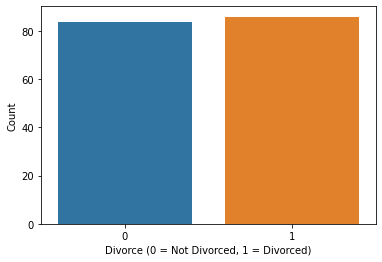

In [68]:
divorce_dist = sns.barplot(x=divorce_data['Class'].unique(), y=divorce_data['Class'].value_counts())
divorce_dist.set(xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)', ylabel = 'Count')

Odnos nekih atributa sa stopom razvoda supružnika:  
*Vrednosti atributa se kreću između 0 (Ne slažem se) i 4 (Slažem se)

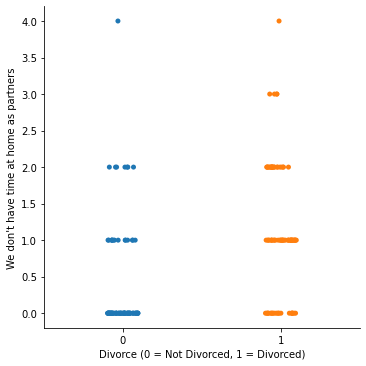

In [66]:
spouse_time_ax = sns.catplot(x="Class", y = "Atr6", hue ="Class", data=divorce_data, col_order = [0, 1])
spouse_time_ax.set(ylabel = 'We don\'t have time at home as partners', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

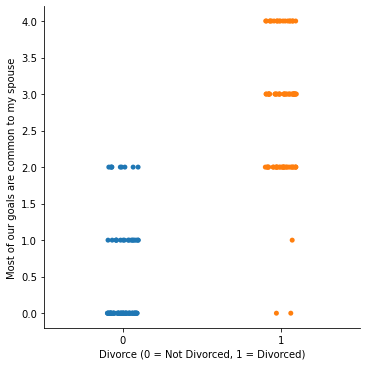

In [65]:
spouse_goals_ax = sns.catplot(x="Class", y = "Atr10", hue ="Class", data=divorce_data, col_order = [0, 1])
spouse_goals_ax.set(ylabel = 'Most of our goals are common to my spouse', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

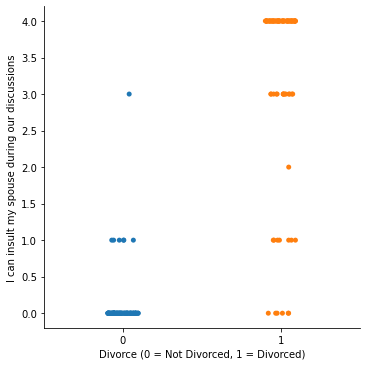

In [64]:
spouse_insult_ax = sns.catplot(x="Class", y = "Atr35", hue ="Class", data=divorce_data, col_order = [0, 1])
spouse_insult_ax.set(ylabel = 'I can insult my spouse during our discussions', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

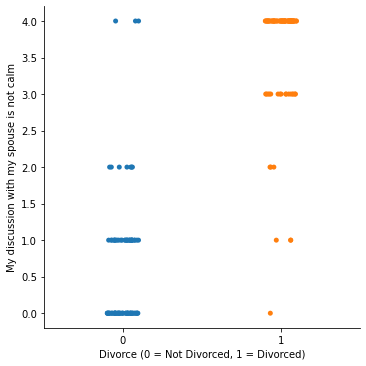

In [70]:
spouse_discussion_not_calm_ax = sns.catplot(x="Class", y = "Atr37", hue ="Class", data=divorce_data, col_order = [0, 1])
spouse_discussion_not_calm_ax.set(ylabel = 'My discussion with my spouse is not calm', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

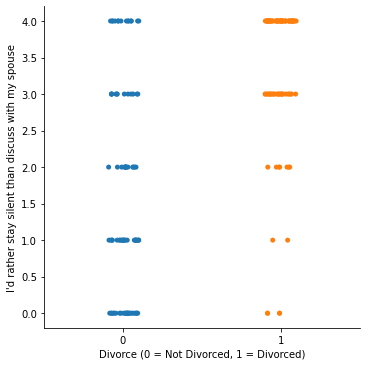

In [69]:
spouse_silent_ax = sns.catplot(x="Class", y = "Atr45", hue ="Class", data=divorce_data, col_order = [0, 1])
spouse_silent_ax.set(ylabel = 'I\'d rather stay silent than discuss with my spouse', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

Ovakvom analizom se može zaključiti da je razvod vrlo verovatan između supružnika koji nemaju mirnu diskusiju i koji mogu vređati jedno drugog. ('I can insult my spouse during our discussions' i 'My discussion with my spouse is not calm')  
Supružnici koji izbegavaju razgovor ili ne provode dovoljno vremena zajedno imaju jednake šanse da ostanu u braku ili da se razvedu. (ćI'd rather stay silent than discuss with my spouse' i 'We don't have time at home as partners')  
Zanimljiv je odnos između zajedničkih ciljeva supružnika i verovatnoće razvoda. Oni koji imaju zajedničke ciljeve imaju veće šanse za razvod. ('Most of our goals are common to my spouse')  

Odnos između atributa:

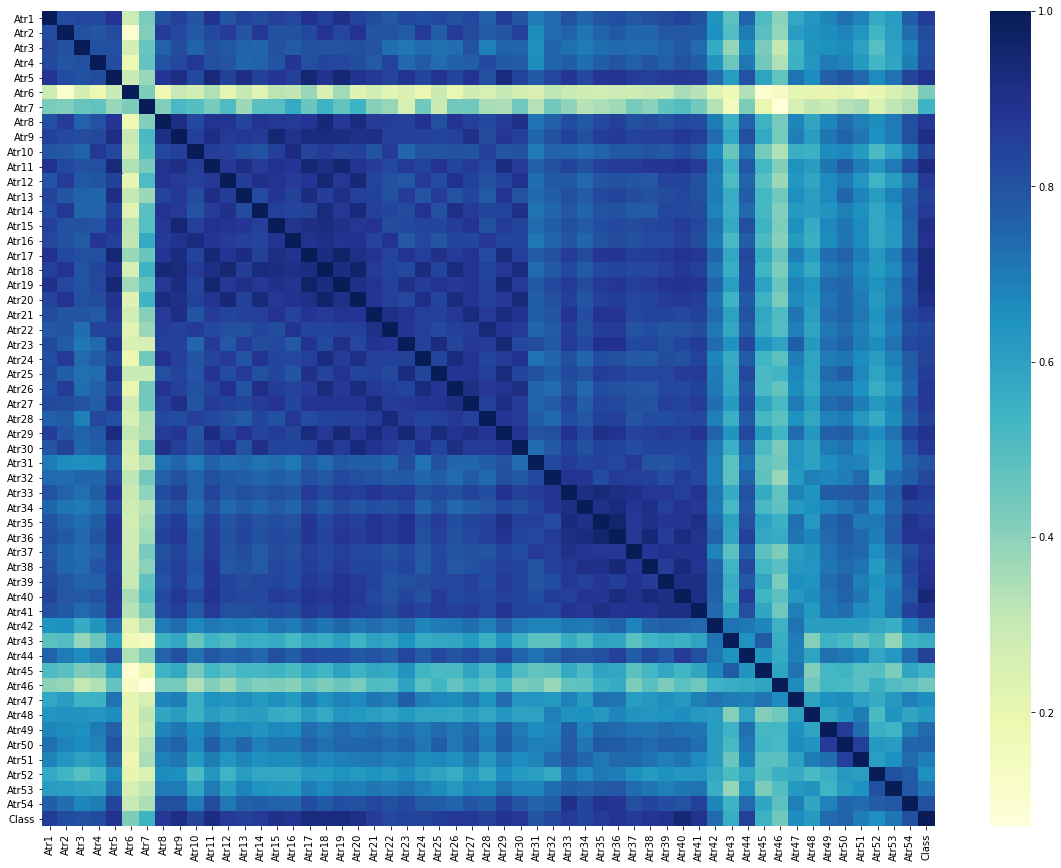

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(divorce_data.corr(), cmap="YlGnBu")
plt.show()